# **ECON 441B: Week 5 Assignments**

Courtney Manhart

## 0.) Import the US Perminent Visas using zip extractor

In [1]:
import pandas as pd
from google.colab import drive
import matplotlib.pyplot as plt
import numpy as np

In [2]:
drive.mount('/content/gdrive/', force_remount = True)

Mounted at /content/gdrive/


## 1.) US perm Visas csv from cycle using zip extractor


In [3]:
import zipfile

zf = zipfile.ZipFile("/content/gdrive/MyDrive/ECON441B/Week 5/us_perm_visas.csv.zip") 
df = pd.read_csv(zf.open('us_perm_visas.csv'))

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (0,1,2,3,4,5,6,7,10,11,16,17,20,21,22,25,26,27,28,29,30,31,32,33,34,35,36,37,39,40,41,42,43,44,45,47,48,49,50,51,52,53,55,56,57,58,59,60,61,63,64,65,66,68,69,70,71,72,73,74,77,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,100,101,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,153) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [4]:
df

,add_these_pw_job_title_9089,agent_city,agent_firm_name,agent_state,application_type,case_no,case_number,case_received_date,case_status,class_of_admission,...,ri_pvt_employment_firm_to,ri_us_workers_considered,schd_a_sheepherder,us_economic_sector,wage_offer_from_9089,wage_offer_to_9089,wage_offer_unit_of_pay_9089,wage_offered_from_9089,wage_offered_to_9089,wage_offered_unit_of_pay_9089
0,NaN,NaN,NaN,NaN,PERM,A-07323-97014,NaN,NaN,Certified,J-1,...,NaN,NaN,NaN,IT,75629.0,NaN,yr,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,PERM,A-07332-99439,NaN,NaN,Denied,B-2,...,NaN,NaN,NaN,Other Economic Sector,37024.0,NaN,yr,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,PERM,A-07333-99643,NaN,NaN,Certified,H-1B,...,NaN,NaN,NaN,Aerospace,47923.0,NaN,yr,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,PERM,A-07339-01930,NaN,NaN,Certified,B-2,...,NaN,NaN,NaN,Other Economic Sector,10.97,NaN,hr,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,PERM,A-07345-03565,NaN,NaN,Certified,L-1,...,NaN,NaN,NaN,Advanced Mfg,100000.0,NaN,yr,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
374357,NaN,Buena Park,Law Offices of Yohan Lee,CA,NaN,NaN,A-16363-85407,2016-12-29,Withdrawn,NaN,...,NaN,NaN,N,NaN,"28,330.00",NaN,Year,NaN,NaN,NaN
374358,NaN,Seattle,MacDonald Hoague & Bayless,WA,NaN,NaN,A-16271-56745,2016-12-30,Withdrawn,L-1,...,NaN,Y,N,NaN,"122,000.00","142,000.00",Year,NaN,NaN,NaN
374359,NaN,Schaumburg,International Legal and Business Services Grou...,IL,NaN,NaN,A-16354-82345,2016-12-30,Withdrawn,H-1B,...,NaN,NaN,N,NaN,"79,082.00","79,082.00",Year,NaN,NaN,NaN
374360,NaN,LOS ANGELES,LAW OFFICES OF JAMES S HONG,CA,NaN,NaN,A-16357-84250,2016-12-30,Withdrawn,B-2,...,NaN,NaN,N,NaN,"37,981.00",NaN,Year,NaN,NaN,NaN


In [5]:
df.isna().sum()

add_these_pw_job_title_9089      332168
agent_city                       162908
agent_firm_name                  167365
agent_state                      166123
application_type                 239093
                                  ...  
wage_offer_to_9089               300728
wage_offer_unit_of_pay_9089      115916
wage_offered_from_9089           259715
wage_offered_to_9089             343347
wage_offered_unit_of_pay_9089    303663
Length: 154, dtype: int64

## 2.) Choose 4 features you think are important. Case_status is your target variable


In [6]:
df.columns

Index(['add_these_pw_job_title_9089', 'agent_city', 'agent_firm_name',
       'agent_state', 'application_type', 'case_no', 'case_number',
       'case_received_date', 'case_status', 'class_of_admission',
       ...
       'ri_pvt_employment_firm_to', 'ri_us_workers_considered',
       'schd_a_sheepherder', 'us_economic_sector', 'wage_offer_from_9089',
       'wage_offer_to_9089', 'wage_offer_unit_of_pay_9089',
       'wage_offered_from_9089', 'wage_offered_to_9089',
       'wage_offered_unit_of_pay_9089'],
      dtype='object', length=154)

In [7]:
data = df[['class_of_admission','pw_amount_9089',
           'us_economic_sector','employer_state', 'case_status']]
data

,class_of_admission,pw_amount_9089,us_economic_sector,employer_state,case_status
0,J-1,75629.0,IT,NY,Certified
1,B-2,37024.0,Other Economic Sector,NY,Denied
2,H-1B,47923.0,Aerospace,VA,Certified
3,B-2,10.97,Other Economic Sector,NY,Certified
4,L-1,94890.0,Advanced Mfg,NY,Certified
...,...,...,...,...,...
374357,NaN,"28,330.00",NaN,CA,Withdrawn
374358,L-1,"107,744.00",NaN,WA,Withdrawn
374359,H-1B,"79,082.00",NaN,MI,Withdrawn
374360,B-2,"37,981.00",NaN,AZ,Withdrawn


## 3.) Clean your data for a decision tree


In [8]:
m = len(data['pw_amount_9089'])
for i in range(m):
  if type(data['pw_amount_9089'][i]) == type(''):
    new_val = data['pw_amount_9089'][i].replace(",", "")
    data.at[i, 'pw_amount_9089'] = float(new_val)

In [9]:
X = pd.get_dummies(data, columns = ['class_of_admission', 'us_economic_sector','employer_state'])

In [10]:
X.isna().sum()

pw_amount_9089              2216
case_status                    0
class_of_admission_A-3         0
class_of_admission_A1/A2       0
class_of_admission_AOS         0
                            ... 
employer_state_WI              0
employer_state_WISCONSIN       0
employer_state_WV              0
employer_state_WY              0
employer_state_WYOMING         0
Length: 189, dtype: int64

In [11]:
X = X.dropna().reset_index(drop = True)
X

,pw_amount_9089,case_status,class_of_admission_A-3,class_of_admission_A1/A2,class_of_admission_AOS,class_of_admission_AOS/H-1B,class_of_admission_B-1,class_of_admission_B-2,class_of_admission_C-1,class_of_admission_C-3,...,employer_state_VIRGINIA,employer_state_VT,employer_state_WA,employer_state_WASHINGTON,employer_state_WEST VIRGINIA,employer_state_WI,employer_state_WISCONSIN,employer_state_WV,employer_state_WY,employer_state_WYOMING
0,75629.0,Certified,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,37024.0,Denied,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,47923.0,Certified,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,10.97,Certified,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,94890.0,Certified,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
372141,28330.0,Withdrawn,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
372142,107744.0,Withdrawn,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
372143,79082.0,Withdrawn,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
372144,37981.0,Withdrawn,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
X.isna().sum()


pw_amount_9089              0
case_status                 0
class_of_admission_A-3      0
class_of_admission_A1/A2    0
class_of_admission_AOS      0
                           ..
employer_state_WI           0
employer_state_WISCONSIN    0
employer_state_WV           0
employer_state_WY           0
employer_state_WYOMING      0
Length: 189, dtype: int64

In [13]:
y = X['case_status']
X = X.drop('case_status', axis = 1)

In [14]:
X

,pw_amount_9089,class_of_admission_A-3,class_of_admission_A1/A2,class_of_admission_AOS,class_of_admission_AOS/H-1B,class_of_admission_B-1,class_of_admission_B-2,class_of_admission_C-1,class_of_admission_C-3,class_of_admission_D-1,...,employer_state_VIRGINIA,employer_state_VT,employer_state_WA,employer_state_WASHINGTON,employer_state_WEST VIRGINIA,employer_state_WI,employer_state_WISCONSIN,employer_state_WV,employer_state_WY,employer_state_WYOMING
0,75629.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,37024.0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,47923.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,10.97,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,94890.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
372141,28330.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
372142,107744.0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
372143,79082.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
372144,37981.0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [15]:
y

0         Certified
1            Denied
2         Certified
3         Certified
4         Certified
            ...    
372141    Withdrawn
372142    Withdrawn
372143    Withdrawn
372144    Withdrawn
372145    Withdrawn
Name: case_status, Length: 372146, dtype: object

## 4.) Fit and plot a decision tree of depth 3


In [16]:
from sklearn import tree

In [17]:
# Fitting the Decision Tree of depth 3
clf = tree.DecisionTreeClassifier(max_depth = 3)
clf.fit(X, y)

DecisionTreeClassifier(max_depth=3)

[Text(0.5, 0.875, 'pw_amount_9089 <= 47590.199\ngini = 0.595\nsamples = 372146\nvalue = [181887, 148555, 23523, 18181]'),
 Text(0.25, 0.625, 'pw_amount_9089 <= 33.42\ngini = 0.674\nsamples = 50161\nvalue = [21986, 15838, 8489, 3848]'),
 Text(0.125, 0.375, 'class_of_admission_Not in USA <= 0.5\ngini = 0.709\nsamples = 5323\nvalue = [1731, 1127, 1920, 545]'),
 Text(0.0625, 0.125, 'gini = 0.657\nsamples = 3350\nvalue = [877, 558, 1640, 275]'),
 Text(0.1875, 0.125, 'gini = 0.691\nsamples = 1973\nvalue = [854, 569, 280, 270]'),
 Text(0.375, 0.375, 'class_of_admission_H-1B <= 0.5\ngini = 0.661\nsamples = 44838\nvalue = [20255, 14711, 6569, 3303]'),
 Text(0.3125, 0.125, 'gini = 0.673\nsamples = 27406\nvalue = [12536, 7793, 4688, 2389]'),
 Text(0.4375, 0.125, 'gini = 0.632\nsamples = 17432\nvalue = [7719, 6918, 1881, 914]'),
 Text(0.75, 0.625, 'pw_amount_9089 <= 81570.0\ngini = 0.579\nsamples = 321985\nvalue = [159901, 132717, 15034, 14333]'),
 Text(0.625, 0.375, 'employer_state_TEXAS <= 0.5\n

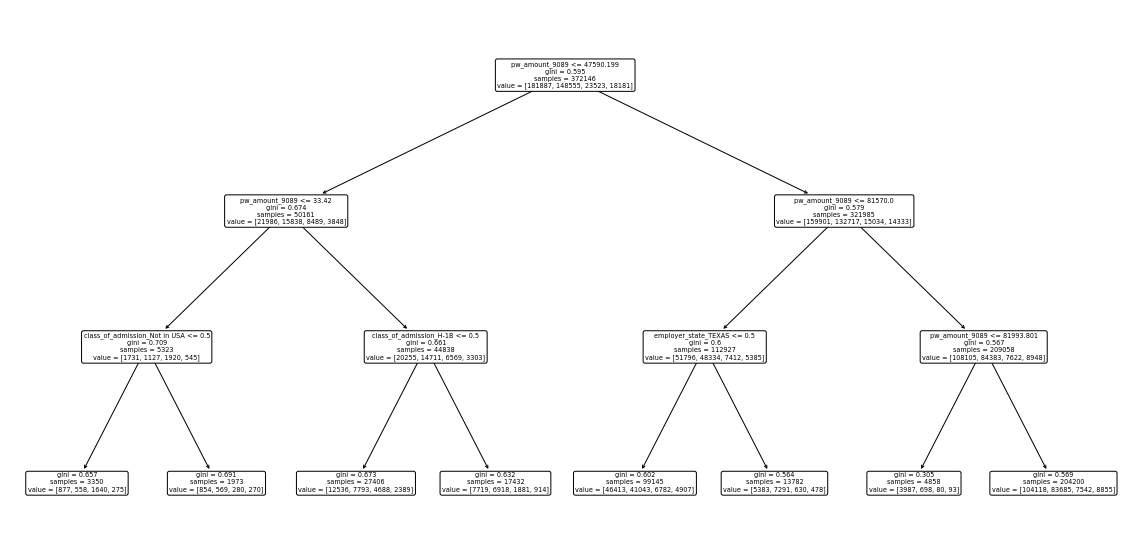

In [18]:
# Plotting the Decision Tree
plt.figure(figsize = (20, 10))
tree.plot_tree(clf, max_depth = 4, rounded = True, 
          feature_names = X.columns)

## 5.) Write your interpretation of the largest (by sample size) leaf node


The largest leaf node (by sample size) contains 204,200 samples. This node represents Visa applications that have a pw_ammount_9089 greater than 81,993.80. 

## 6.) Using a for loop, make your own train-test split and determine the best max_depth for out-of sample accuracy

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, random_state=0)

from sklearn import metrics

accuracy = []
max_depths = [1, 2, 3, 4]
for md in max_depths:
  clf = tree.DecisionTreeClassifier(max_depth = md)
  clf.fit(X_train, y_train)

  # Calculate an out of Sample Accuracy
  oos_accuracy = clf.score(X_test, y_test)

  accuracy.append(oos_accuracy)

auc = pd.DataFrame(accuracy, index = max_depths, columns = ['Accuracy'])
auc

,Accuracy
1,0.486774
2,0.487236
3,0.493105
4,0.500027


Max_depth = 4 gives us the largest out-of-sample accuracy for this decision tree. 